In [1]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import time


#from scipy.stats import linregress
import json
from pprint import pprint

all_agencies = "agencies/all_agencies.csv" #this csv provides all the agencies reporting crime in the subject 4 cities
agency_df = pd.read_csv(all_agencies)

fbi_url = "https://api.usa.gov/crime/fbi/sapi/"

from config import fbi_key


agencies = agency_df["ori"]
agg_assault = []
burglary = []
larceny = []
mvt = []
homicide = []
rape = []
robbery = []
arson = []
viol_crime = []
prop_crime = []
crime = []



In [2]:
#This cell gets the response for all the agencies per year

##################################################
#for agency in agencies:

#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
    #url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2019/2019?API_KEY={fbi_key}"
    #response = requests.get(url)
    #response_json = response.json()
    
    #crime.extend(response_json["results"])

    #if we want to do specific offenses, put offenses in as {offenses}
    #print(response_json['results'])
###############################################

In [3]:
#county agencies - Reference of the county agencies assessed
#Brazos (college station) ori - TX0210000
#College Station (city) ori - TX0210200
#Waco (city) ori - TX1551200
#McLennan (Waco) ori - TX1550000
#Dallas (Dallas) ori - TX0570000
#Dallas (city) ori - TXDPD0000
#San Antonio (Bexar) ori - TX0150000
#San Antonio (city) ori - TXSPD0000

In [4]:
#for agency in agencies:
    
#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
#    url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2018/2019?API_KEY={fbi_key}"
#    response = requests.get(url)
#    response_json = response.json()
    
#    crime.extend(response_json["results"])

#crime_all_df=pd.DataFrame(crime)
#crime_all_df


In [5]:
#crime_all_df.to_csv(r'C:/Users/oscar/Desktop/Repos/Project-1/crime_all_df.csv')

In [6]:
crime_all_df = "crime_all_df.csv" #this csv provides all the crimes in the 4 cities
crime_all_df = pd.read_csv(crime_all_df)
crime_all_df

,Unnamed: 0,ori,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,2018,robbery,TX,0,0
1,1,TX0153500,2018,aggravated-assault,TX,31,31
2,2,TX0153500,2018,arson,TX,0,0
3,3,TX0153500,2018,burglary,TX,2,2
4,4,TX0153500,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...
1351,1351,TX1551200,2019,homicide,TX,5,10
1352,1352,TX1551200,2019,human-trafficing,TX,0,0
1353,1353,TX1551200,2019,larceny,TX,919,3492
1354,1354,TX1551200,2019,motor-vehicle-theft,TX,56,323


In [7]:
agency_df.head()

,Unnamed: 0,ori,county,name,region,lat,lon,"lat,lon"
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147"
1,1,TX0151100,BEXAR,Olmos Park Police Department,South,29.471867,-98.490600,"29.471867,-98.4906"
2,2,TX0150000,BEXAR,Bexar County Sheriff's Office,South,29.429178,-98.507170,"29.429178,-98.50717"
3,3,TX0151300,BEXAR,Terrell Hills Police Department,South,29.474962,-98.459260,"29.474962,-98.45926"
4,4,TX0150200,BEXAR,Balcones Heights Police Department,South,29.490864,-98.554760,"29.490864,-98.55476"


In [8]:
merge_df = pd.merge(agency_df, crime_all_df, on = "ori")
merge_df

,Unnamed: 0_x,ori,county,name,region,lat,lon,"lat,lon",Unnamed: 0_y,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",0,2018,robbery,TX,0,0
1,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",1,2018,aggravated-assault,TX,31,31
2,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2,2018,arson,TX,0,0
3,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",3,2018,burglary,TX,2,2
4,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",4,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1351,2019,homicide,TX,5,10
1352,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1352,2019,human-trafficing,TX,0,0
1353,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1353,2019,larceny,TX,919,3492
1354,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1354,2019,motor-vehicle-theft,TX,56,323


In [9]:
#merge_df.to_csv(r'C:/Users/oscar/Desktop/Repos/Project-1/merge_df.csv')

In [10]:
####Population per county in 100 thousand units
bexar_pop=20
dallas_pop=26
mc_pop=2.56
brazos_pop=2.29
Total_pop=bexar_pop+dallas_pop+mc_pop+brazos_pop
west_pop=bexar_pop+brazos_pop
north_pop=mc_pop+dallas_pop
pop_list=[bexar_pop,brazos_pop,dallas_pop,mc_pop]
police_officers=[2895/bexar_pop,1582/brazos_pop,4635/dallas_pop,1677/mc_pop] #amount of police officers in each county per capita


In [11]:
county_df=merge_df.groupby("county").sum()
county_df["actual"]
total_actual_df=pd.DataFrame(county_df["actual"])
total_actual_df #this df reports the total crimes in each county

,actual
county,
BEXAR,41321
BRAZOS,22502
DALLAS,60928
MCLENNAN,31448


In [12]:
per_capita= (county_df['actual']/pop_list).round(0)
per_capita_df=pd.DataFrame(per_capita)
per_capita_df #this df reports the total crimes in each county per capita

,actual
county,
BEXAR,2066.0
BRAZOS,9826.0
DALLAS,2343.0
MCLENNAN,12284.0


In [13]:
by_countyoffense=merge_df.groupby(["county","offense"]).sum()["actual"]
by_countyoffense_df=pd.DataFrame(by_countyoffense)
by_countyoffense_df #df to analyze offenses for each county

actual
county   offense                    
BEXAR    aggravated-assault     1474
         arson                   115
         burglary               3003
         homicide                 30
         human-trafficing          0
         larceny               13806
         motor-vehicle-theft    1555
         property-crime        18364
         rape                    392
         rape-legacy              25
         robbery                 318
         violent-crime          2239
BRAZOS   aggravated-assault      767
         arson                    22
         burglary               1637
         homicide                  7
         human-trafficing          0
         larceny                7611
         motor-vehicle-theft     698
         property-crime         9946
         rape                    306
         rape-legacy              27
         robbery                 187
         violent-crime          1294
DALLAS   aggravated-assault     1508
         arson                    52
         burglary               3522
         homicide                 34
         human-trafficing          0
         larceny               20045
         motor-vehicle-theft    3757
         property-crime        27324
         rape                    330
         rape-legacy              77
         robbery                1165
         violent-crime          3114
MCLENNAN aggravated-assault     1476
         arson                    50
         burglary               2599
         homicide                 15
         human-trafficing          0
         larceny                9662
         motor-vehicle-theft    1040
         property-crime        13301
         rape                    361
         rape-legacy             244
         robbery                 302
         violent-crime          2398

In [14]:
def f(row):
    if row.name[0]=="BEXAR":
        return row['actual']/bexar_pop
    elif row.name[0]=="BRAZOS":
        return row['actual']/brazos_pop
    elif row.name[0]=="DALLAS":
        return row['actual']/dallas_pop
    elif row.name[0]=="MCLENNAN":
        return row['actual']/mc_pop
a=by_countyoffense_df.apply(f,axis=1)
by_countyoffense_pc_df=pd.DataFrame(a)
by_countyoffense_pc_df

0
county   offense                         
BEXAR    aggravated-assault     73.700000
         arson                   5.750000
         burglary              150.150000
         homicide                1.500000
         human-trafficing        0.000000
         larceny               690.300000
         motor-vehicle-theft    77.750000
         property-crime        918.200000
         rape                   19.600000
         rape-legacy             1.250000
         robbery                15.900000
         violent-crime         111.950000
BRAZOS   aggravated-assault    334.934498
         arson                   9.606987
         burglary              714.847162
         homicide                3.056769
         human-trafficing        0.000000
         larceny              3323.580786
         motor-vehicle-theft   304.803493
         property-crime       4343.231441
         rape                  133.624454
         rape-legacy            11.790393
         robbery                81.659389
         violent-crime         565.065502
DALLAS   aggravated-assault     58.000000
         arson                   2.000000
         burglary              135.461538
         homicide                1.307692
         human-trafficing        0.000000
         larceny               770.961538
         motor-vehicle-theft   144.500000
         property-crime       1050.923077
         rape                   12.692308
         rape-legacy             2.961538
         robbery                44.807692
         violent-crime         119.769231
MCLENNAN aggravated-assault    576.562500
         arson                  19.531250
         burglary             1015.234375
         homicide                5.859375
         human-trafficing        0.000000
         larceny              3774.218750
         motor-vehicle-theft   406.250000
         property-crime       5195.703125
         rape                  141.015625
         rape-legacy            95.312500
         robbery               117.968750
         violent-crime         936.718750

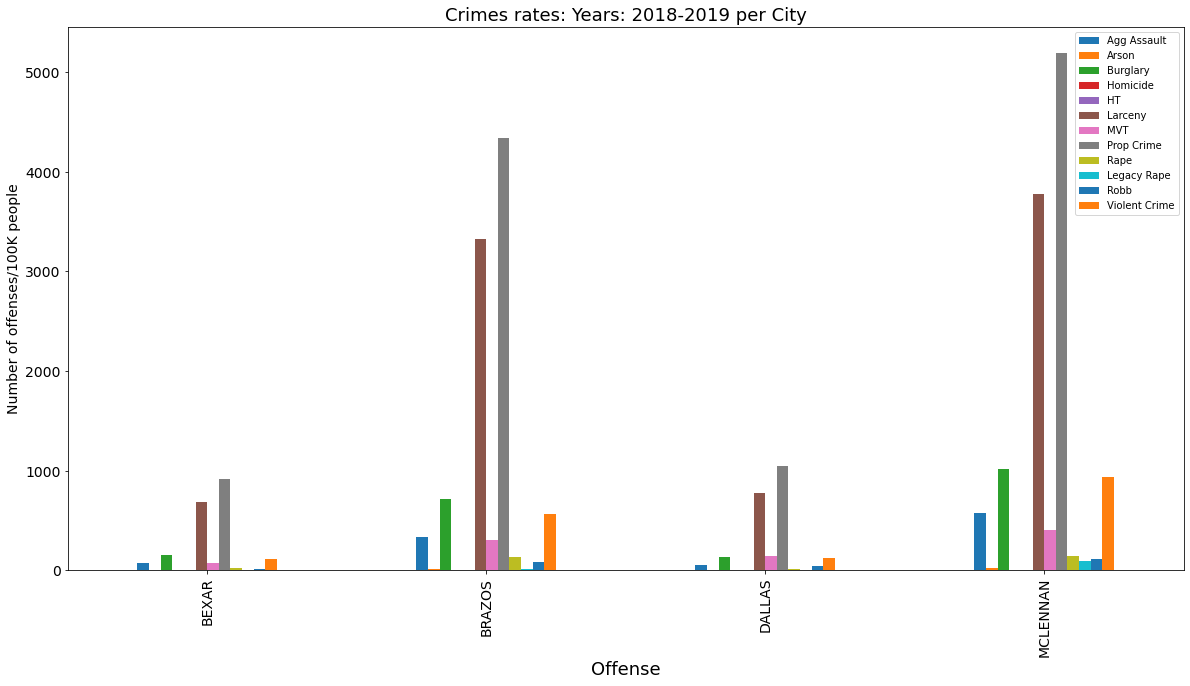

In [15]:
plot1=by_countyoffense_pc_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=14)
plot1.legend(['Agg Assault','Arson','Burglary','Homicide','HT','Larceny','MVT','Prop Crime','Rape','Legacy Rape','Robb','Violent Crime'])
plt.xlabel("Offense",fontsize=18)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates: Years: 2018-2019 per City',fontsize=18)
plt.savefig("figures/county_by_crime_per_capita.png")

In [16]:
test=merge_df.groupby(["offense","county"]).sum()["actual"]

test=pd.DataFrame(test)
test

actual
offense             county          
aggravated-assault  BEXAR       1474
                    BRAZOS       767
                    DALLAS      1508
                    MCLENNAN    1476
arson               BEXAR        115
                    BRAZOS        22
                    DALLAS        52
                    MCLENNAN      50
burglary            BEXAR       3003
                    BRAZOS      1637
                    DALLAS      3522
                    MCLENNAN    2599
homicide            BEXAR         30
                    BRAZOS         7
                    DALLAS        34
                    MCLENNAN      15
human-trafficing    BEXAR          0
                    BRAZOS         0
                    DALLAS         0
                    MCLENNAN       0
larceny             BEXAR      13806
                    BRAZOS      7611
                    DALLAS     20045
                    MCLENNAN    9662
motor-vehicle-theft BEXAR       1555
                    BRAZOS       698
                    DALLAS      3757
                    MCLENNAN    1040
property-crime      BEXAR      18364
                    BRAZOS      9946
                    DALLAS     27324
                    MCLENNAN   13301
rape                BEXAR        392
                    BRAZOS       306
                    DALLAS       330
                    MCLENNAN     361
rape-legacy         BEXAR         25
                    BRAZOS        27
                    DALLAS        77
                    MCLENNAN     244
robbery             BEXAR        318
                    BRAZOS       187
                    DALLAS      1165
                    MCLENNAN     302
violent-crime       BEXAR       2239
                    BRAZOS      1294
                    DALLAS      3114
                    MCLENNAN    2398

In [17]:
def f(row):
    if row.name[1]=="BEXAR":
        return row['actual']/bexar_pop
    elif row.name[1]=="BRAZOS":
        return row['actual']/brazos_pop
    elif row.name[1]=="DALLAS":
        return row['actual']/dallas_pop
    elif row.name[1]=="MCLENNAN":
        return row['actual']/mc_pop
b=test.apply(f,axis=1)
by_crime_pc_df=pd.DataFrame(b)
by_crime_pc_df

0
offense             county               
aggravated-assault  BEXAR       73.700000
                    BRAZOS     334.934498
                    DALLAS      58.000000
                    MCLENNAN   576.562500
arson               BEXAR        5.750000
                    BRAZOS       9.606987
                    DALLAS       2.000000
                    MCLENNAN    19.531250
burglary            BEXAR      150.150000
                    BRAZOS     714.847162
                    DALLAS     135.461538
                    MCLENNAN  1015.234375
homicide            BEXAR        1.500000
                    BRAZOS       3.056769
                    DALLAS       1.307692
                    MCLENNAN     5.859375
human-trafficing    BEXAR        0.000000
                    BRAZOS       0.000000
                    DALLAS       0.000000
                    MCLENNAN     0.000000
larceny             BEXAR      690.300000
                    BRAZOS    3323.580786
                    DALLAS     770.961538
                    MCLENNAN  3774.218750
motor-vehicle-theft BEXAR       77.750000
                    BRAZOS     304.803493
                    DALLAS     144.500000
                    MCLENNAN   406.250000
property-crime      BEXAR      918.200000
                    BRAZOS    4343.231441
                    DALLAS    1050.923077
                    MCLENNAN  5195.703125
rape                BEXAR       19.600000
                    BRAZOS     133.624454
                    DALLAS      12.692308
                    MCLENNAN   141.015625
rape-legacy         BEXAR        1.250000
                    BRAZOS      11.790393
                    DALLAS       2.961538
                    MCLENNAN    95.312500
robbery             BEXAR       15.900000
                    BRAZOS      81.659389
                    DALLAS      44.807692
                    MCLENNAN   117.968750
violent-crime       BEXAR      111.950000
                    BRAZOS     565.065502
                    DALLAS     119.769231
                    MCLENNAN   936.718750

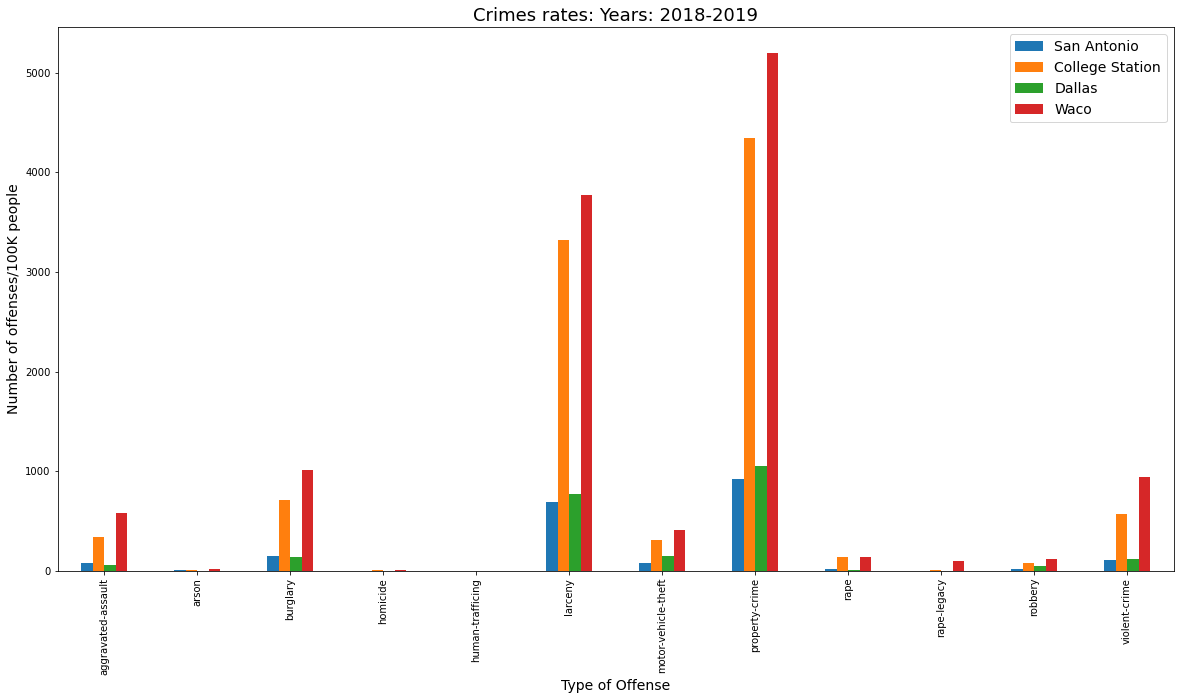

In [18]:
plot2=by_crime_pc_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=10 )
plot2.legend(['San Antonio','College Station','Dallas','Waco'], fontsize=14)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates: Years: 2018-2019',fontsize=18)
plt.savefig("figures/offenses_by_county_per_capita.png")

In [19]:

county_2018_df=merge_df[(merge_df.data_year==2018)]
county_2018_df=county_2018_df.groupby("county").sum()
county_2018_df=county_2018_df['actual']/pop_list
county_2018_df=pd.DataFrame(county_2018_df).round(0)
county_2018_df=county_2018_df.rename(columns={"actual":2018})
county_2018_df

,2018
county,
BEXAR,1024.0
BRAZOS,5099.0
DALLAS,1181.0
MCLENNAN,6251.0


In [20]:
county_2019_df=merge_df[(merge_df.data_year==2019)]
county_2019_df=county_2019_df.groupby("county").sum()
county_2019_df=county_2019_df['actual']/pop_list
county_2019_df=pd.DataFrame(county_2019_df).round(0)
county_2019_df=county_2019_df.rename(columns={"actual":2019})
county_2019_df

,2019
county,
BEXAR,1042.0
BRAZOS,4727.0
DALLAS,1162.0
MCLENNAN,6034.0


In [21]:
county_total_peryear_df=pd.concat([county_2018_df,county_2019_df], axis=1)
county_total_peryear_df


,2018,2019
county,,
BEXAR,1024.0,1042.0
BRAZOS,5099.0,4727.0
DALLAS,1181.0,1162.0
MCLENNAN,6251.0,6034.0


In [22]:
year_county=merge_df.groupby(["data_year",'county']).sum()["actual"]
year_county_df=pd.DataFrame(year_county)
year_county_df=(year_county_df).round(0)

In [23]:
def f(row):
    if row.name[1]=="BEXAR":
        return row['actual']/bexar_pop
    elif row.name[1]=="BRAZOS":
        return row['actual']/brazos_pop
    elif row.name[1]=="DALLAS":
        return row['actual']/dallas_pop
    elif row.name[1]=="MCLENNAN":
        return row['actual']/mc_pop
c=year_county_df.apply(f,axis=1)
total_by_year_df=pd.DataFrame(c).round(0)
total_by_year_df=total_by_year_df.rename(columns={0:'actual'})
total_by_year_df

actual
data_year county          
2018      BEXAR     1024.0
          BRAZOS    5099.0
          DALLAS    1181.0
          MCLENNAN  6251.0
2019      BEXAR     1042.0
          BRAZOS    4727.0
          DALLAS    1162.0
          MCLENNAN  6034.0

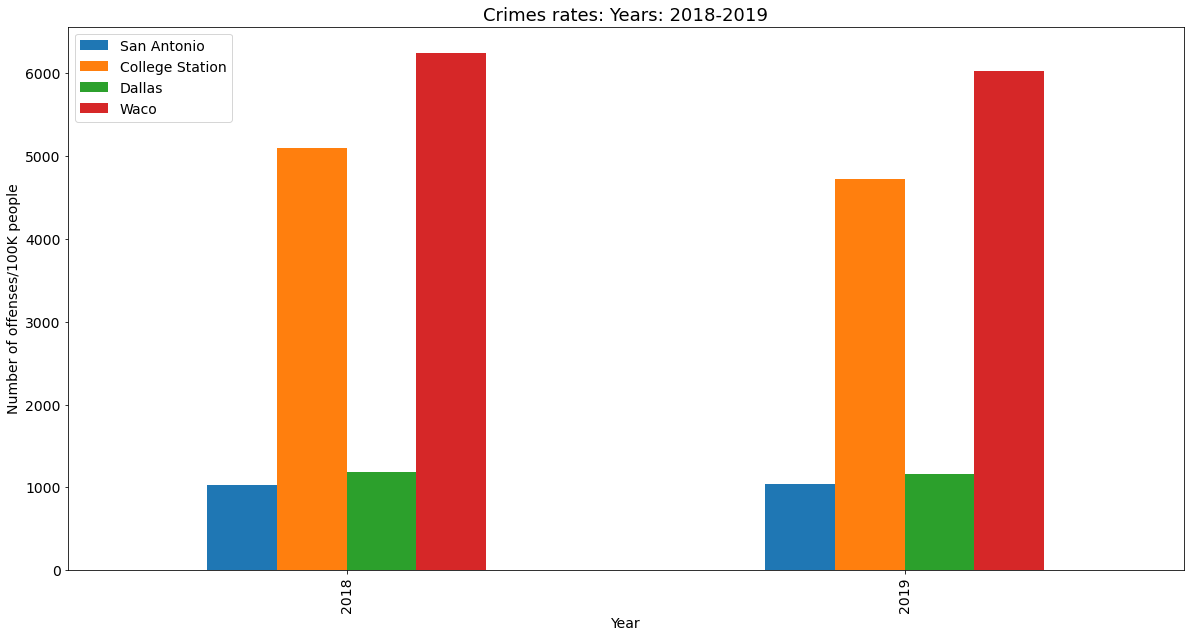

In [24]:
plot3=total_by_year_df.unstack().plot(kind='bar', figsize=(20,10), fontsize =14)
plt.legend(['San Antonio','College Station','Dallas','Waco'], fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates: Years: 2018-2019',fontsize=18)
plt.savefig("figures/offense_total.png")

In [25]:
west_df=merge_df[(merge_df.county=="BRAZOS")|(merge_df.county=="BEXAR")]
west_df

,Unnamed: 0_x,ori,county,name,region,lat,lon,"lat,lon",Unnamed: 0_y,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",0,2018,robbery,TX,0,0
1,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",1,2018,aggravated-assault,TX,31,31
2,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2,2018,arson,TX,0,0
3,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",3,2018,burglary,TX,2,2
4,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",4,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",631,2019,larceny,TX,233,1444
632,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",632,2019,human-trafficing,TX,0,0
633,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",633,2019,homicide,TX,1,2
634,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",634,2019,burglary,TX,50,336


In [26]:
######creating df for type of offense--- these two blocks extract the counts for each offense in rows to convert them into columns

In [27]:
type=["aggravated-assault","arson","burglary","homicide","human-trafficing","larceny","motor-vehicle-theft","property-crime","rape","rape-legacy","robbery","violent-crime"]

In [28]:
agg_assault=(merge_df[(merge_df.offense=='aggravated-assault')]['actual'].reset_index(drop=True))

arson=(merge_df[(merge_df.offense=='arson')]['actual'].reset_index(drop=True))

burglary=(merge_df[(merge_df.offense=='burglary')]['actual'].reset_index(drop=True))

homicide=(merge_df[(merge_df.offense=='homicide')]['actual'].reset_index(drop=True))

hum_traffic=(merge_df[(merge_df.offense=='human-trafficing')]['actual'].reset_index(drop=True))

larceny=(merge_df[(merge_df.offense=='larceny')]['actual'].reset_index(drop=True))

mvt=(merge_df[(merge_df.offense=='motor-vehicle-theft')]['actual'].reset_index(drop=True))

property_crime=(merge_df[(merge_df.offense=='property-crime')]['actual'].reset_index(drop=True))

rape=(merge_df[(merge_df.offense=='rape')]['actual'].reset_index(drop=True))

rape_leg=(merge_df[(merge_df.offense=='rape_legacy')]['actual'].reset_index(drop=True))

robbery=(merge_df[(merge_df.offense=='robbery')]['actual'].reset_index(drop=True))

viol_crime=(merge_df[(merge_df.offense=='violent_crime')]['actual'].reset_index(drop=True))

In [29]:
agg_assault=pd.DataFrame(agg_assault).rename(columns={'actual':'agg_assault'})

arson=pd.DataFrame(arson).rename(columns={'actual':'arson'})

burglary=pd.DataFrame(burglary).rename(columns={'actual':'burglary'})

homicide=pd.DataFrame(homicide).rename(columns={'actual':'homicide'})

hum_traffic=pd.DataFrame(hum_traffic).rename(columns={'actual':'hum_traffic'})

larceny=pd.DataFrame(larceny).rename(columns={'actual':'larceny'})

mvt=pd.DataFrame(mvt).rename(columns={'actual':'mvt'})

prop_crime=pd.DataFrame(property_crime).rename(columns={'actual':'property_crime'})

rape=pd.DataFrame(rape).rename(columns={'actual':'rape'})

robbery=pd.DataFrame(robbery).rename(columns={'actual':'robber'})

viol_crime=pd.DataFrame(viol_crime).rename(columns={'actual':'viol_crime'})







In [30]:
crimes_df=pd.concat([agg_assault,arson,burglary, homicide,larceny,mvt,prop_crime,rape,robbery], axis=1)
crimes_df=crimes_df.replace(np.nan,0)
crimes_df

,agg_assault,arson,burglary,homicide,larceny,mvt,property_crime,rape,robber
0,31,0,2,0,7,0,9,0,0
1,24,0,3,0,15,0,18,0,0
2,1,0,5,0,17,2,24,0,0
3,1,0,8,0,23,0,31,0,0
4,372,49,975,10,3770,421,5166,166,79
...,...,...,...,...,...,...,...,...,...
108,10,0,5,0,80,6,91,6,0
109,101,1,77,0,544,39,660,16,11
110,73,3,68,0,514,58,640,13,13
111,501,20,1099,2,3350,328,4777,129,121


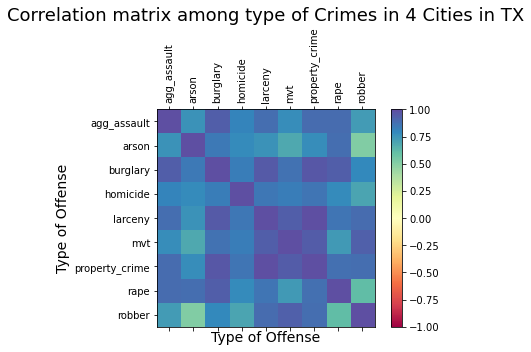

<Figure size 432x288 with 0 Axes>

In [31]:
corr = crimes_df.corr()
fig = plt.figure()
test = fig.add_subplot()
colors_test = test.matshow(corr,cmap='Spectral', vmin=-1, vmax=1)
fig.colorbar(colors_test)
ticks = np.arange(0,len(crimes_df.columns),1)
test.set_xticks(ticks)
plt.xticks(rotation=90)
test.set_yticks(ticks)
test.set_xticklabels(crimes_df.columns)
test.set_yticklabels(crimes_df.columns)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Type of Offense",fontsize=14)
plt.title('Correlation matrix among type of Crimes in 4 Cities in TX',fontsize=18)
plt.show()
plt.savefig("figures/correlation_matrix_4.png")

In [32]:
#Group_Labels = ["aggravated-assault","arson","burglary","homicide","human-trafficing","larceny","motor-vehicle-theft","property-crime","rape","rape-legacy","robbery","violent-crime"]



In [33]:
west_df=merge_df[(merge_df.county=="BRAZOS")|(merge_df.county=="BEXAR")]
west_df=west_df.groupby(["offense","county"]).sum()["actual"]
west_df=pd.DataFrame(west_df)
west_df


actual
offense             county        
aggravated-assault  BEXAR     1474
                    BRAZOS     767
arson               BEXAR      115
                    BRAZOS      22
burglary            BEXAR     3003
                    BRAZOS    1637
homicide            BEXAR       30
                    BRAZOS       7
human-trafficing    BEXAR        0
                    BRAZOS       0
larceny             BEXAR    13806
                    BRAZOS    7611
motor-vehicle-theft BEXAR     1555
                    BRAZOS     698
property-crime      BEXAR    18364
                    BRAZOS    9946
rape                BEXAR      392
                    BRAZOS     306
rape-legacy         BEXAR       25
                    BRAZOS      27
robbery             BEXAR      318
                    BRAZOS     187
violent-crime       BEXAR     2239
                    BRAZOS    1294

In [34]:
def f(row):
    if row.name[1]=="BEXAR":
        return row['actual']/bexar_pop
    elif row.name[1]=="BRAZOS":
        return row['actual']/brazos_pop
    
c=west_df.apply(f,axis=1)
by_crimew_pc_df=pd.DataFrame(c)
by_crimew_pc_df=by_crimew_pc_df.rename(columns={0:'actual'})
by_crimew_pc_df

actual
offense             county             
aggravated-assault  BEXAR     73.700000
                    BRAZOS   334.934498
arson               BEXAR      5.750000
                    BRAZOS     9.606987
burglary            BEXAR    150.150000
                    BRAZOS   714.847162
homicide            BEXAR      1.500000
                    BRAZOS     3.056769
human-trafficing    BEXAR      0.000000
                    BRAZOS     0.000000
larceny             BEXAR    690.300000
                    BRAZOS  3323.580786
motor-vehicle-theft BEXAR     77.750000
                    BRAZOS   304.803493
property-crime      BEXAR    918.200000
                    BRAZOS  4343.231441
rape                BEXAR     19.600000
                    BRAZOS   133.624454
rape-legacy         BEXAR      1.250000
                    BRAZOS    11.790393
robbery             BEXAR     15.900000
                    BRAZOS    81.659389
violent-crime       BEXAR    111.950000
                    BRAZOS   565.065502

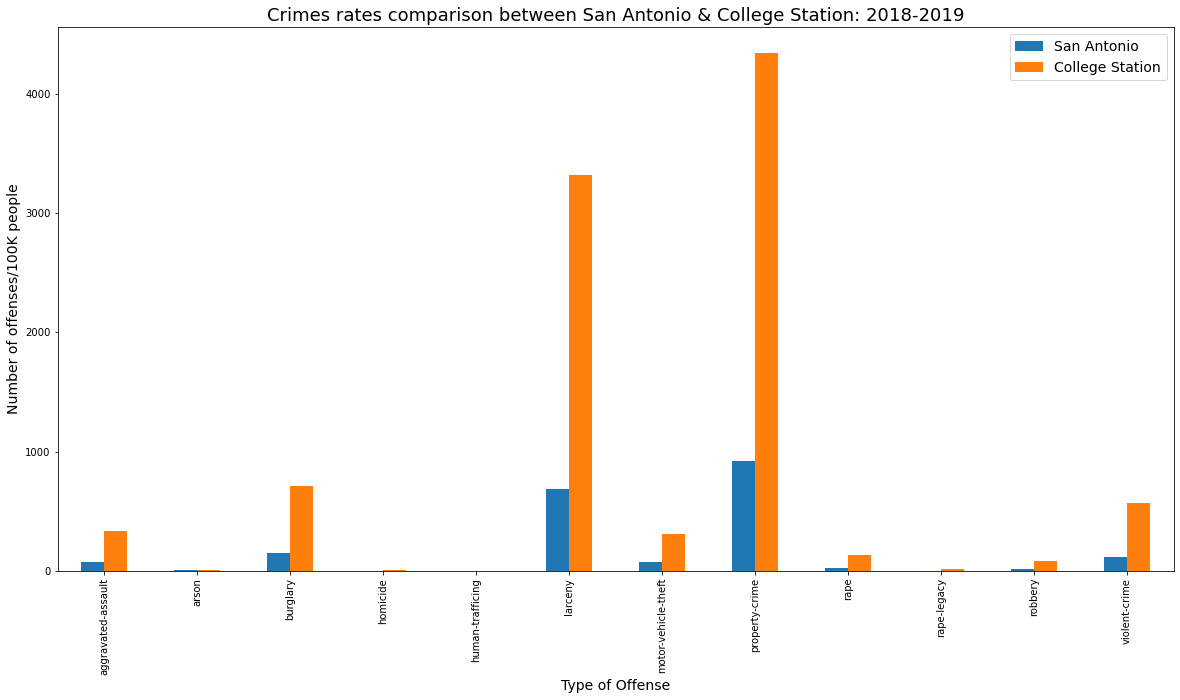

In [35]:
plot3=by_crimew_pc_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=10 )
plot3.legend(['San Antonio','College Station'], fontsize=14)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates comparison between San Antonio & College Station: 2018-2019',fontsize=18)
plt.savefig("figures/offense_SA_CS_per_capita.png")

In [36]:
north_df=merge_df[(merge_df.county=="DALLAS")|(merge_df.county=="MCLENNAN")]
north_df=north_df.groupby(["offense","county"]).sum()["actual"]
north_df=pd.DataFrame(north_df)
north_df

actual
offense             county          
aggravated-assault  DALLAS      1508
                    MCLENNAN    1476
arson               DALLAS        52
                    MCLENNAN      50
burglary            DALLAS      3522
                    MCLENNAN    2599
homicide            DALLAS        34
                    MCLENNAN      15
human-trafficing    DALLAS         0
                    MCLENNAN       0
larceny             DALLAS     20045
                    MCLENNAN    9662
motor-vehicle-theft DALLAS      3757
                    MCLENNAN    1040
property-crime      DALLAS     27324
                    MCLENNAN   13301
rape                DALLAS       330
                    MCLENNAN     361
rape-legacy         DALLAS        77
                    MCLENNAN     244
robbery             DALLAS      1165
                    MCLENNAN     302
violent-crime       DALLAS      3114
                    MCLENNAN    2398

In [37]:
def f(row):
        if row.name[1]=="DALLAS":
            return row['actual']/dallas_pop
        elif row.name[1]=="MCLENNAN":
            return row['actual']/mc_pop
    
d=north_df.apply(f,axis=1)
by_crimen_pc_df=pd.DataFrame(d)
by_crimen_pc_df=by_crimew_pc_df.rename(columns={0:'actual'})
by_crimen_pc_df

actual
offense             county             
aggravated-assault  BEXAR     73.700000
                    BRAZOS   334.934498
arson               BEXAR      5.750000
                    BRAZOS     9.606987
burglary            BEXAR    150.150000
                    BRAZOS   714.847162
homicide            BEXAR      1.500000
                    BRAZOS     3.056769
human-trafficing    BEXAR      0.000000
                    BRAZOS     0.000000
larceny             BEXAR    690.300000
                    BRAZOS  3323.580786
motor-vehicle-theft BEXAR     77.750000
                    BRAZOS   304.803493
property-crime      BEXAR    918.200000
                    BRAZOS  4343.231441
rape                BEXAR     19.600000
                    BRAZOS   133.624454
rape-legacy         BEXAR      1.250000
                    BRAZOS    11.790393
robbery             BEXAR     15.900000
                    BRAZOS    81.659389
violent-crime       BEXAR    111.950000
                    BRAZOS   565.065502

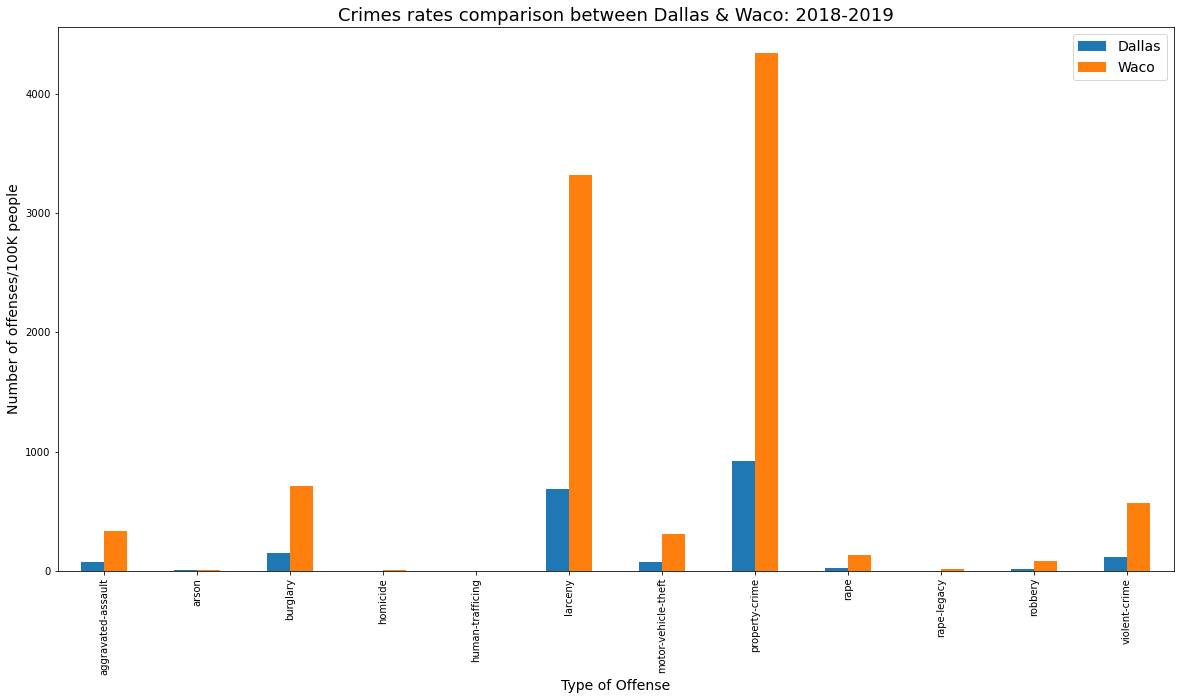

In [38]:
plot4=by_crimen_pc_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=10 )
plot4.legend(['Dallas','Waco'], fontsize=14)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates comparison between Dallas & Waco: 2018-2019',fontsize=18)
plt.savefig("figures/offense_D_W_per_capita")

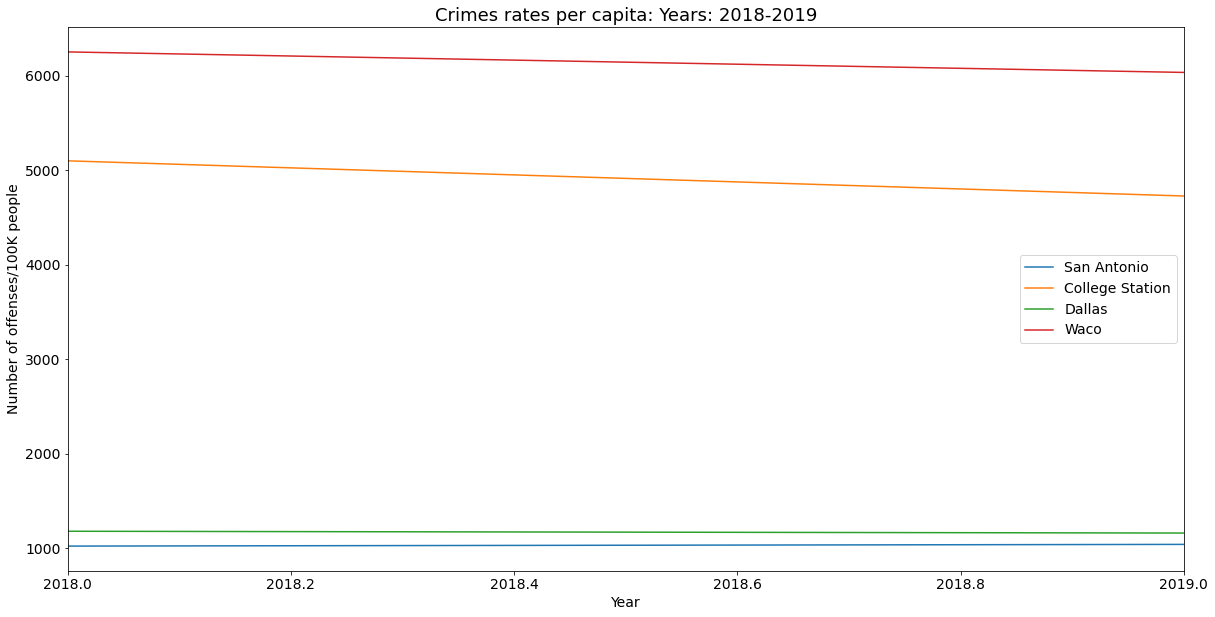

In [39]:
plot5=total_by_year_df.unstack().plot(kind='line', figsize=(20,10), fontsize =14)
plt.legend(['San Antonio','College Station','Dallas','Waco'], fontsize=14)
plt.xlim(2018,2019)

plt.xlabel("Year",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates per capita: Years: 2018-2019',fontsize=18)
plt.savefig("figures/offense_total.png")

In [40]:
###########PREDICTING CRIME RATE WITH A LINEAR FIT FOR 2020 ############################

In [41]:
years=[2018,2019]

In [42]:
bexar2018=county_total_peryear_df[2018][0]
bexar2019=county_total_peryear_df[2019][0]
bexar=[bexar2018,bexar2019]
bexar

[1024.0, 1042.0]

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, bexar)
bexar2020=2020*slope+intercept
print(f'San Antonio could have a crime rate in 2020 of {bexar2020} crimes per 100K people')

San Antonio could have a crime rate in 2020 of 1060.0 crimes per 100K people


In [44]:
brazos2018=county_total_peryear_df[2018][1]
brazos2019=county_total_peryear_df[2019][1]
brazos=[brazos2018,brazos2019]
brazos


[5099.0, 4727.0]

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, brazos)
brazos2020=2020*slope+intercept
print(f'College Station could have a crime rate in 2020 of {brazos2020} crimes per 100K people')

College Station could have a crime rate in 2020 of 4355.0 crimes per 100K people


In [46]:
dallas2018=county_total_peryear_df[2018][2]
dallas2019=county_total_peryear_df[2019][2]
dallas=[dallas2018,dallas2019]
dallas

[1181.0, 1162.0]

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, dallas)
dallas2020=2020*slope+intercept
print(f'Dallas could have a crime rate in 2020 of {dallas2020} crimes per 100K people')

Dallas could have a crime rate in 2020 of 1143.0 crimes per 100K people


In [48]:
mc2018=county_total_peryear_df[2018][3]
mc2019=county_total_peryear_df[2019][3]
mc=[mc2018,mc2019]
mc

[6251.0, 6034.0]

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, mc)
mc2020=2020*slope+intercept
print(f'Waco could have a crime rate in 2020 of {mc2020} crimes per 100K people')

Waco could have a crime rate in 2020 of 5817.0 crimes per 100K people


In [50]:
#######################################################################

In [53]:
left=per_capita_df.reset_index()
right=pd.DataFrame(police_officers)
county_police_df=pd.concat([left,right], axis=1)
county_police_df=county_police_df.rename(columns={0:'Officers', 'actual':'Offenses'})
county_police_df

,county,Offenses,Officers
0,BEXAR,2066.0,144.750000
1,BRAZOS,9826.0,690.829694
2,DALLAS,2343.0,178.269231
3,MCLENNAN,12284.0,655.078125


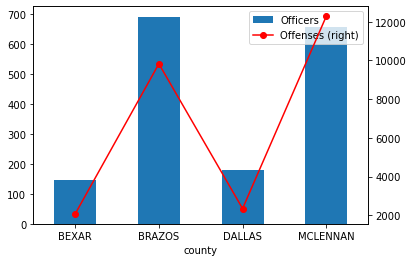

In [68]:
ax = county_police_df[['county', 'Officers']].plot(x='county', kind='bar')
county_police_df[['county', 'Offenses']].plot(ax=ax ,x='county', linestyle='-', marker='o', color ='r',secondary_y=True)
plt.ylabel=('this is a test')
plt.title=('Total number of offenses/100K people')
plt.show()